# Introduction √† la Science de Donn√©es
# TP2 -  Classification par les $k$ plus proches voisins


La documentation Scikit-learn sur les $k$ plus proches voisins se trouve ici: http://scikit-learn.org/stable/modules/neighbors.html


Avant de commencer, v√©rifiez les versions des paquets Python:

In [1]:
import sys
import numpy as np # importation du package num√©rique
import matplotlib
import sklearn

print('python: {} (version 3 obligatoire)'.format(sys.version))
print('numpy: {} (version conseill√©e mais pas obligatoire:)'.format(np.__version__))
print('matplotlib: {} (version conseill√©e mais pas obligatoire: 3.0.0 au moins)'.format(matplotlib.__version__))
print('scikit-learn: {} (version conseill√©e mais pas obligatoire: 0.19 au moins)'.format(sklearn.__version__))

python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0] (version 3 obligatoire)
numpy: 1.20.1 (version conseill√©e mais pas obligatoire:)
matplotlib: 3.3.4 (version conseill√©e mais pas obligatoire: 3.0.0 au moins)
scikit-learn: 0.24.1 (version conseill√©e mais pas obligatoire: 0.19 au moins)


Une version r√©cente de Matplotlib est particuli√®rement souhaitable pour que l'affichage des images se fasse correctement, sans "lissage".

## 1. Donn√©es *digits*
Dans la premi√®re partie de ce TP, nous allons utiliser des donn√©es d√©j√† pr√©sentes dans scikit-learn, √† l'image des donn√©es Iris du premier TP.

Ces donn√©es sont tr√®s connues en apprentissage, sous le noms de MNIST. Elles sont compos√©es d'images de chiffres manuscrits √† une r√©solution de 8*8. En scikit-learn, elles se nomment digits : 

In [2]:
from sklearn.datasets import load_digits

digitsData=load_digits() # jeu de donn√©es digits
X=digitsData.data # les exemples, un array numpy, chaque √©l√©ment est aussi un array
y=digitsData.target # les classes

On peut regarder quelques informations :

In [3]:
print(X.dtype, X.shape)
print(y.dtype, y.shape)

float64 (1797, 64)
int64 (1797,)


Chaque donn√©e est donc une image de 8 pixels par 8 pixels, en niveau de gris (256 nuances possibles), stock√©e sous la forme d'un vecteur de dimension 64 comme une ligne de la matrice X (il y a 1797 images) et avec la valeur de la classe associ√©e stock√©e dans un vecteur Y √† part (comme pour Iris). Mais on peut quand m√™me regarder l'image initiale :




Le vecteur de l'image d'indice 42 :  [ 0.  0.  0.  9. 10.  0.  0.  0.  0.  0.  7. 16.  7.  0.  0.  0.  0.  0.
 13. 13.  1.  0.  0.  0.  0.  0. 15.  7.  0.  0.  0.  0.  0.  4. 16. 15.
 12.  7.  0.  0.  0.  2. 16. 12.  4. 11. 10.  0.  0.  0.  8. 14.  5.  9.
 14.  0.  0.  0.  0.  6. 12. 14.  9.  0.]
[[ 0.  0.  0.  9. 10.  0.  0.  0.]
 [ 0.  0.  7. 16.  7.  0.  0.  0.]
 [ 0.  0. 13. 13.  1.  0.  0.  0.]
 [ 0.  0. 15.  7.  0.  0.  0.  0.]
 [ 0.  4. 16. 15. 12.  7.  0.  0.]
 [ 0.  2. 16. 12.  4. 11. 10.  0.]
 [ 0.  0.  8. 14.  5.  9. 14.  0.]
 [ 0.  0.  0.  6. 12. 14.  9.  0.]]


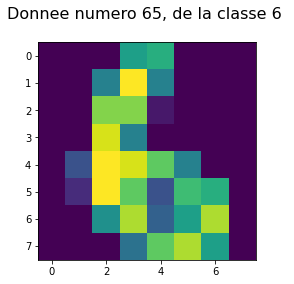

In [4]:
import matplotlib.pyplot as plt  # le package de visualisation
# la ligne sp√©ciale pour que le notebook affiche comme il faut :
%matplotlib inline  
ix=65
donnee = X[ix,:] # on r√©cup√®re une ligne, donc une donn√©e
classe = y[ix]   # et sa classe
print("Le vecteur de l'image d'indice 42 : ", donnee)

image = np.reshape(donnee,(8,8)) # on met les 8 morceaux de taille 8 du vecteur les uns en dessous des autres
print(image) # on affiche la matrice de pixels
plt.imshow(image) # on affiche l'image qui lui correspond
plt.title('Donnee numero %i, de la classe %i \n' % (ix, classe), fontsize = 16) # avec un titre
plt.show()

On peut faire des affichages plus int√©ressant, exemple sur les 5 premi√®res donn√©es :

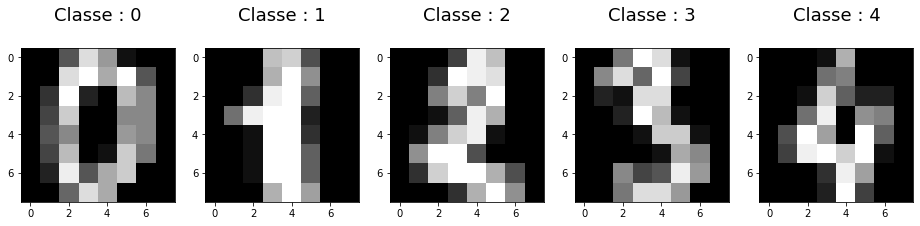

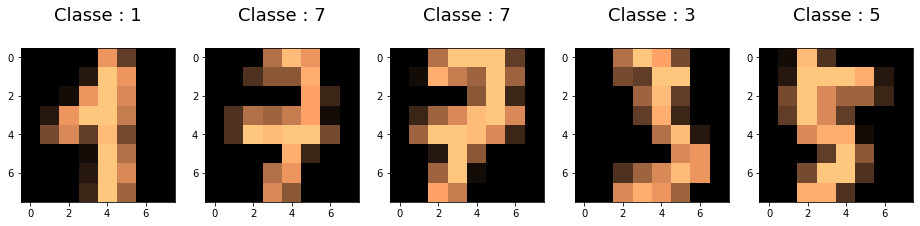

In [5]:
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[index, :]
    classe = y[index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Classe : %i\n' % classe, fontsize = 18)
plt.show()
    
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[42+index, :]
    classe = y[42+index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Classe : %i\n' % classe, fontsize = 18)  
plt.show()

## 2. Cr√©ation et entra√Ænement d'un classifieur

Notre objectif est maintenant d'apprendre, sur la base d'un √©chantillon d'images "chiffres", un classifieur capable de pr√©dire le chiffre qui correspond √† une nouvelle image. Nous allons utiliser la m√©thode des $k$-plus proches voisins pour cet apprentissage. Elle est impl√©ment√©e dans un package appel√© neighbors. Examinons la s√©rie d'instructions suivante:

In [6]:
from sklearn import neighbors as nn # importation du package d'algorithmes travaillant sur les points voisins
help(nn.KNeighborsClassifier) # que fait cette instruction qui sera tr√®s utile par la suite?

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

Sympa, non ? Ce type d'instruction est utilisable pour toute classe de Python. 

Continuons l'exploration des $k$ plus proches voisins. Dans la s√©rie d'instructions suivante, on indique comment un classifieur peut √™tre appris √† partir de donn√©es √©tiquet√©es, et comment r√©aliser la pr√©diction sur un nouvel exemple.

Les fonctions *predict* et *fit* existent **pour tous les classifieurs** disponibles dans scikit-learn.

On note ici la syntaxe de la fonction predict: on lui passe en r√©alit√© un tableau d'exemples (ici, un tableau avec un seul exemple constitu√© de 64 attributs), et elle renvoit un tableau contenant la classe pr√©dite pour chaque exemple du tableau en param√®tre. Evidemment, dans les tableaux en entr√©e et en sortie, les indices des classes pr√©dites correspondent aux indices des exemples en entr√©e ! 

Ainsi, lorsque l'on sait que l'on n'applique predict qu'√† un seul exemple, une s√©lection finale [0] comme ci-apr√®s renvoit la premi√®re (et la seule) composante du tableau de r√©sultat. 

In [7]:
nb_voisins = 15 # on fixe le nombre de voisins, √† partir de 2 et au max le nombre d'exemples dans le jeu de donn√©es
clf = nn.KNeighborsClassifier(nb_voisins) 
# ci-dessus, cr√©ation d'un classifieur: la variable clf est un "objet" classifieur, vide pour l'instant 
#print(clf) # le classifieur est vide pour l'instant, il n'a pas √©t√© entra√Æn√© sur des donn√©es
clf.fit(X, y) # entra√Ænement du classifieur clf sur les donn√©es √©tiquet√©es
nouvel_ex = X[50, :]  # On extrait la 50e image
print('pr√©diction pour le nouvel exemple: ',
      clf.predict(nouvel_ex.reshape(1,-1))) # pr√©diction du mod√®le appris sur la description d'une image al√©atoire

pr√©diction pour le nouvel exemple:  [2]


In [8]:
print('pr√©diction pour le nouvel exemple: ', clf.predict(nouvel_ex.reshape(1,-1))[0])

pr√©diction pour le nouvel exemple:  2


Pour certains types de classifieurs, on peut m√™me r√©cup√©rer la probabilit√© que le classifieur attribue √† l'appartenance de l'exemple √† chaque classe possible. La fonction *predict_proba* fonctionne comme la fonction *predict*, sauf que le tableau en sortie contient, pour chaque exemple du tableau en entr√©e, un tableau de probabilit√© de la m√™me taille que le nombre de classes.

In [9]:
autre_ex = X[123, :] # on g√©n√®re un autre exemple en prenant une autre image
print(clf.predict_proba(nouvel_ex.reshape(1,-1))[0]) # probabilit√© d'appartenance √† chaque classe pour ce chiffre
print(clf.predict_proba(autre_ex.reshape(1,-1))[0]) # idem pour un autre exemple

[0.  0.  0.8 0.  0.  0.  0.  0.  0.2 0. ]
[0.         0.46666667 0.         0.         0.         0.
 0.         0.         0.53333333 0.        ]


A votre avis, quelle classe sera attribu√©e au deuxi√®me exemple, et pourquoi ? Indiquez ci-apr√®s l'instruction √† ex√©cuter pour v√©rifier. 

La classe la plus probable pour l'exemple de n¬∞123 est l'avant derni√®re (classe 8), avec une probabilit√© de 0.53, sup√©rieure √† la probabilit√© d'appartenir √† la classe 1 (0.47). On le v√©rifie gr√¢ce √† l'ex√©cution ci-apr√®s. On note que ces probabilit√©s somment √† 1.

Concernant le premier exemple (n¬∞50), la pr√©diction par classification donnait la classe 2 : c'est effectivement celle qui donnait la probabilit√© d'appartenance laplus grande (0.80), sachant que les classes sont num√©rot√©es de 0 √† 9.

In [10]:
print('pr√©diction pour l exemple 123: classe ', clf.predict(autre_ex.reshape(1,-1))[0])

pr√©diction pour l exemple 123: classe  8


Une premi√®re fa√ßon d'√©valuer la qualit√© d'un classifieur est de le tester sur les exemples qui ont servi √† l'apprendre. On utilise du coup la m√™me fonction *predict*, appliqu√©e au tableau des exemples d'apprentissage. 

In [11]:
f_X = clf.predict(X) # vecteur des classes pr√©dites pour chaque exemple de l'ensemble d'apprentissage
print(X[f_X!=y]) # le tableau d'exemples pour lesquels la pr√©diction a √©t√© mauvaise

[[ 0.  0. 12. ... 10.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16. 12.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  1.  7. ...  6.  0.  0.]
 [ 0.  0.  5. ...  3.  0.  0.]]


Pour vous rendre compte de l'origine possible des erreurs de pr√©diction, faites une boucle sur toutes les images pour lesquelles la pr√©diction est erronn√©e en affichant √† chaque fois l'image 8x8 avec dans le titre l'indice de l'image, la classe originale et la classe pr√©dite (pour cela, on peut utiliser la fonction *numpy.argwhere* avec un peu de jugeotte).

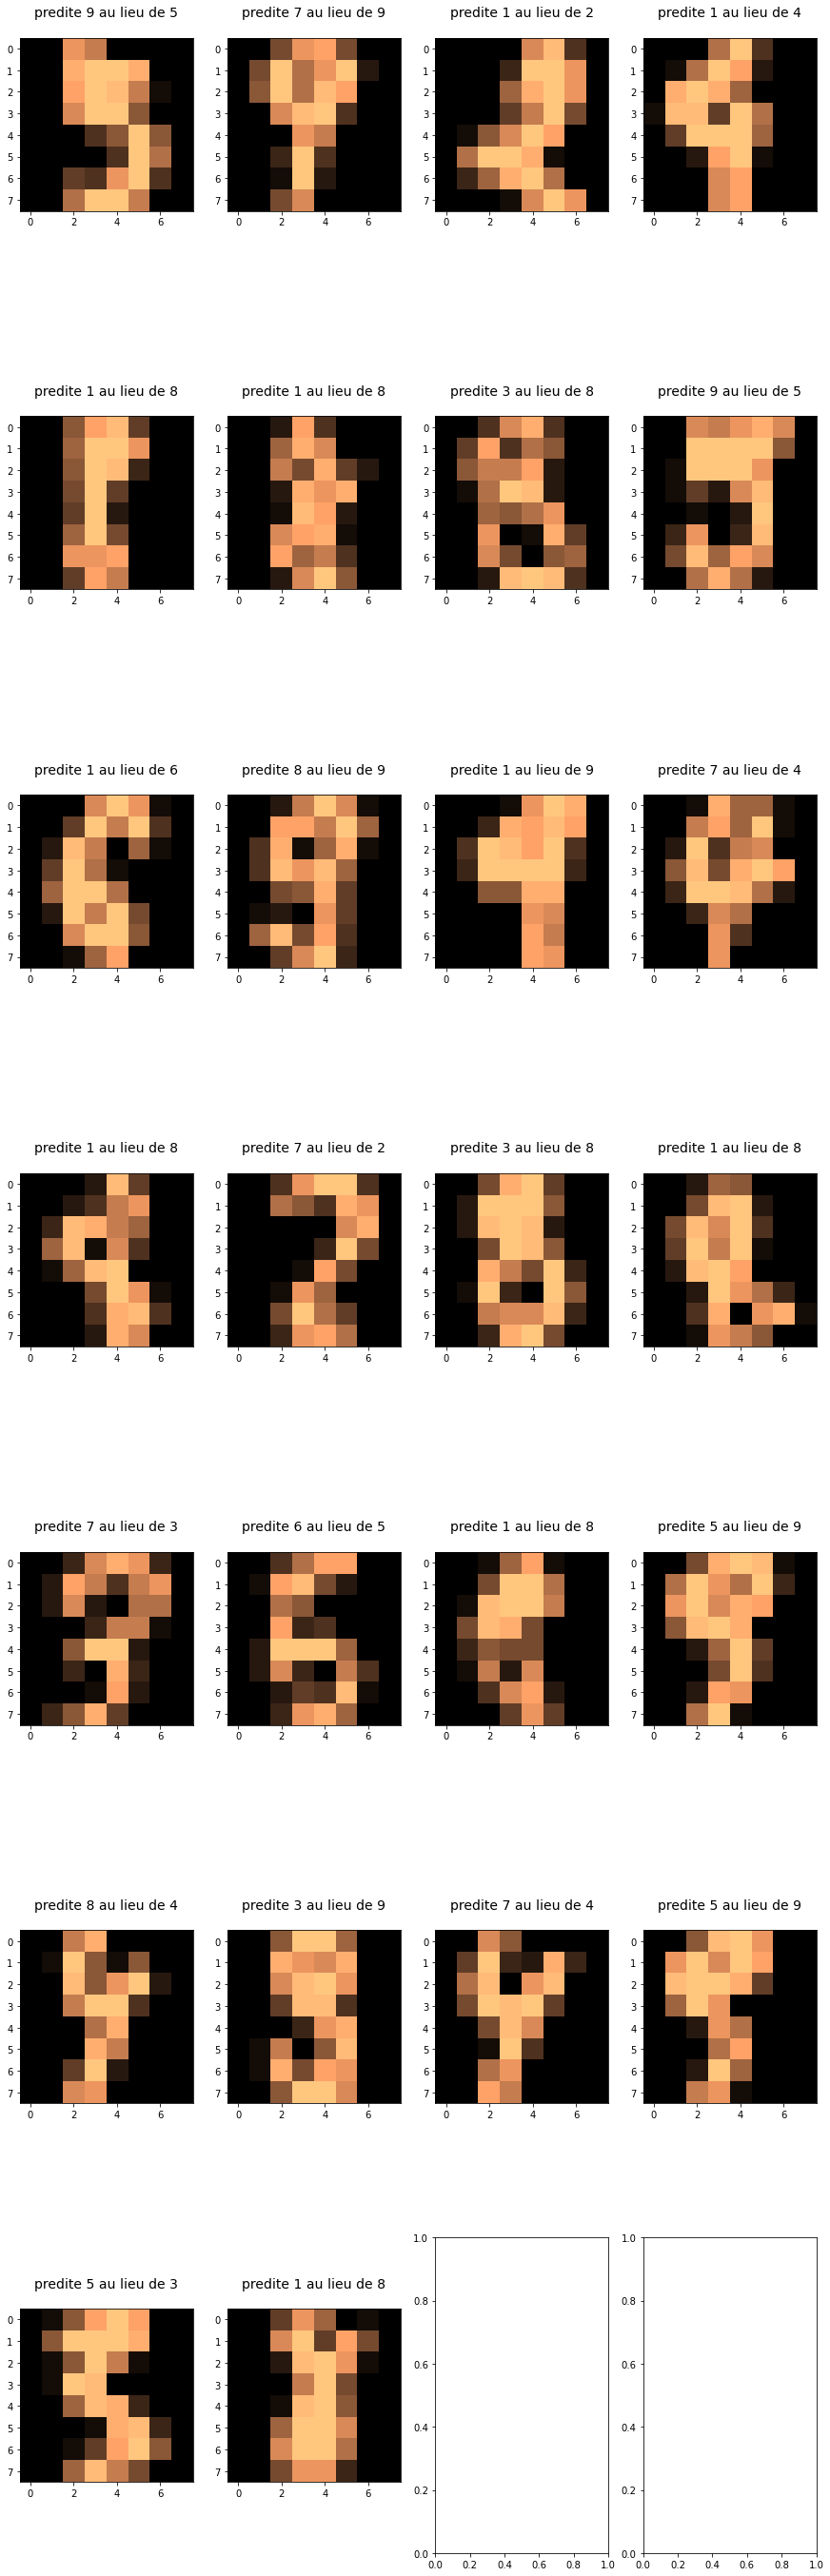

In [12]:
yPredit = clf.predict(X)
iex = np.argwhere(y!=yPredit)
nb_rows = int(iex.shape[0]/4)+1
fig, axes = plt.subplots(nb_rows,4, figsize=(15, 50))
i = 0
for index in iex:
    image = X[index, :]
    classe = y[index]
    predite = yPredit[index]
    xax = i//4
    yax = i%4 
    axes[xax,yax].imshow(np.reshape(image, (8,8)), cmap="copper")
    axes[xax,yax].set_title('predite %i au lieu de %i\n' % (predite, classe), fontsize = 14)
#    axes[xax,yax].set_title('predite '+str(predite)+' au lieu de '+str(classe)+'\n', fontsize = 14)
    i = i+1
plt.show()

Chaque classifieur poss√®de une fonction score, qui permet de comparer les pr√©dictions d'un ensemble d'exemples $X$ pour lesquelles on conna√Æt les √©tiquettes $y$ : la fonction calcule le taux de bonne classifications. 

In [13]:
print('taux de bonne classification', clf.score(X,y)) # taux de bonne classification du mod√®le sur l'ensemble d'apprentissage: fonction score

taux de bonne classification 0.9855314412910406


On la d√©tourne facilement pour obtenir le taux d'erreur: faites le (vous devez obtenir 0.01446855...)!

In [14]:
score = clf.score(X,y)
erreur = 1 - score
print(erreur)

0.014468558708959356


## 3. Variation du nombre de voisins

L'algorithme des $k$-plus proches voisins fonctionne avec plusieurs hyper-param√®tres (param√®tres de l'agorithme, pas du mod√®le appris): la valeur de $k$ est un de ces param√®tres. R√©alisez un programme qui fait varier cet hyper-param√®tres dans un intervalle comprenant des valeurs entre 1 et 25, et stocker l'√©volution de l'erreur d'apprentissage (celle calcul√©e sur l'√©chantillon d'apprentissage), puis en r√©aliser une courbe avec en abscisse les valeurs de k, et en ordonn√©es les erreurs.

On peut utiliser pour ce faire la fonction de construction d'un tableau *numpy.arange* (cf documentation), la fonction *len(X)* qui renvoit la taille d'un tableau √† une dimension. Pour la courbe, on utilisera simplement *plot(abs, ord)* du package *pyplot* de *matplotlib*, comme vue au premier TP.

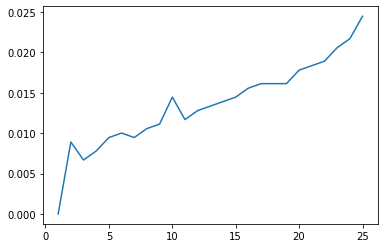

In [15]:
rangek = np.arange(1,26,dtype=int)
erreur_app = np.zeros(25)
for k in rangek:
    clf = nn.KNeighborsClassifier(k) 
    clf.fit(X,y)
    erreur_app[k-1] = 1-clf.score(X,y)

plt.plot(rangek, erreur_app)

Qu'observez-vous ? A quelle valeur de k atteint-on un meilleur classifieur ? Quelle est globalement, sur ce jeu de donn√©es, l'influence de $k$? Que se passe-t-il exactement pour $k=1$?

Plus $k$ augmente, plus l'erreur semble augmenter, sauf quelques exceptions. Mais les erreurs restent faibles. On remarque que lorsque $k=1$, l'erreur sur l'√©chantillon d'apprentissage est nulle : c'est normal, puisque le 1-plus proche voisin d'un exemple est lui m√™me, donc sa propre classe lui sera attribu√©e, donc on ne fait pas d'erreur ! Cela ne devient plus vrai si l'on estime l'erreur de l'algorithme avec un autre √©chantillon que celui qui a servi √† apprendre !

Ici, le meilleur hyper-param√®tre semble √™tre $k=3$, mais en r√©alit√© ce n'est pas sur l'√©chantillon d'apprentissage que nous devrions le retenir. 

## 4. Evaluation de l'erreur r√©elle du classifieur appris 

### 4.1. Hold-out
Lorsque le score du classifieur appris est √©valu√© sur l'ensemble d'apprentissage, il est en g√©n√©ral sur-estim√© (pourquoi ?) et donc, tr√®s peu fiable. La meilleure m√©thode pour √©valuer un classifieur consiste √† calculer son score sur un √©chantillon test, ind√©pendant de l'√©chantillon d'apprentissage mais g√©n√©r√© dans les m√™mes
conditions. Lorsqu'on dispose d'un seul ensemble d'exemples (comme c'est le cas de *digits*, il faut donc:

* r√©partir les donn√©es en un sous-ensemble d'apprentissage et un sous-ensemble test,
* entrainer un classifieur sur l'ensemble d'apprentissage 
* √©valuer ce classifieur sur l'ensemble test (on a ici une √©valuation de l'erreur r√©elle, qui reste instable puisque d√©pend du d√©coupage effectu√©)

Si les donn√©es sont peu nombreuses, comme c'est le cas pour le jeu de donn√©es *digits*, cette √©valuation risque d'√™tre pessimiste (avez-vous une id√©e de pourquoi ? Si oui, expliquez, sinon r√©fl√©chissez!).

Scikit-learn vient avec toute une panoplie d'outils pour √©valuer cette erreur. Pour l'instant, nous n'utiliserons que la fonction qui permet de diviser un √©chantillon en deux parties (attributs et classes): c'est la fonction *train_test_split* du package *model_selection*, que nous appliquons ci-apr√®s sur Iris (nous ne printons que les trois premiers exemples de chaque sous-√©chantillon, avec leurs √©tiquettes):


In [16]:
from sklearn.model_selection import train_test_split
# production de deux sous-√©chantillon
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=42) 
print(Xtrain[:3,:], ytrain[:3])
print(Xtest[:3,:], ytest[:3])

[[ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
  13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
  16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
   0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
  11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
  12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
  10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
 [ 0.  0.  4. 13.  8.  0.  0.  0.  0.  0. 13. 16. 15.  7.  0.  0.  0.  3.
  16.  9.  6. 15.  6.  0.  0.  8. 14.  0.  0.  4.  8.  0.  0.  8. 12.  0.
   0.  4.  8.  0.  0.  4. 12.  0.  0. 11.  6.  0.  0.  0. 14. 10. 12. 14.
   1.  0.  0.  0.  7. 15. 11.  2.  0.  0.]] [5 2 0]
[[ 0.  0.  0.  7. 12.  0.  0.  0.  0.  0.  4. 16.  8.  0.  0.  0.  0.  0.
  12. 11.  0.  0.  0.  0.  0.  0. 15. 10.  8.  6.  1.  0.  0.  0. 15. 16.
   8. 10.  8.  0.  0.  0. 14.  7.  0.  0. 12.  0

Ici, nous produisons un d√©coupage dans lequel l'ensemble d'apprentissage repr√©sente 75% de l'√©chantillon initial, et l'√©chantillon de test repr√©sente 25% des donn√©es initiales.

Il faut bien comprendre le r√¥le du param√®tre random_state qui initialise le processus al√©atoire: avec la m√™me valeur dans deux appels de lafonction train_test_split, la s√©paration du jeu de donn√©es obtenue restera identique, car l'initialisation de la s√©lection al√©atoire est la m√™me. Pour illustrer cela, r√©aliser un second appel avec les m√™mes param√®tres et v√©rifier les premiers √©l√©ments des tableaux obtenus qui doivent √™tre similaires √† ceux ci-avant; puis r√©aliser un troisi√®me appel avec une autre valeur pour random_state, et v√©rifier √† nouveau les premiers √©l√©ments des tableaux pour constater qu'ils ont chang√©.

In [17]:
# meme valeur de random_state
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=42) 
print(Xtrain[:3,:], ytrain[:3])
print(Xtest[:3,:], ytest[:3])

[[ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
  13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
  16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
   0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
  11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
  12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
  10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
 [ 0.  0.  4. 13.  8.  0.  0.  0.  0.  0. 13. 16. 15.  7.  0.  0.  0.  3.
  16.  9.  6. 15.  6.  0.  0.  8. 14.  0.  0.  4.  8.  0.  0.  8. 12.  0.
   0.  4.  8.  0.  0.  4. 12.  0.  0. 11.  6.  0.  0.  0. 14. 10. 12. 14.
   1.  0.  0.  0.  7. 15. 11.  2.  0.  0.]] [5 2 0]
[[ 0.  0.  0.  7. 12.  0.  0.  0.  0.  0.  4. 16.  8.  0.  0.  0.  0.  0.
  12. 11.  0.  0.  0.  0.  0.  0. 15. 10.  8.  6.  1.  0.  0.  0. 15. 16.
   8. 10.  8.  0.  0.  0. 14.  7.  0.  0. 12.  0

In [18]:
# autre valeur de random_state
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=18) 
print(Xtrain[:3,:], ytrain[:3])
print(Xtest[:3,:], ytest[:3])

[[ 0.  2. 10. 14. 11.  1.  0.  0.  0.  7. 15.  8. 16.  4.  0.  0.  0.  1.
   1.  6. 15.  1.  0.  0.  0.  0.  0. 15.  9.  0.  0.  0.  0.  0.  1. 16.
  15.  9.  1.  0.  0.  0.  0.  1.  6. 15.  8.  0.  0.  2.  8.  4.  6. 15.
   7.  0.  0.  2. 13. 16. 15.  9.  0.  0.]
 [ 0.  0.  0. 13. 13.  0.  0.  0.  0.  0.  7. 16.  3.  0.  0.  0.  0.  0.
  12. 11.  0.  0.  0.  0.  0.  0. 14.  6.  0.  0.  0.  0.  0.  1. 16. 12.
  16. 11.  3.  0.  0.  2. 16. 15.  9.  9. 15.  2.  0.  0. 11. 12.  1.  3.
  16.  6.  0.  0.  1. 13. 16. 16. 15.  1.]
 [ 0.  0.  5. 12.  1.  0.  0.  0.  0.  0. 15. 14.  7.  0.  0.  0.  0.  0.
  13.  1. 12.  0.  0.  0.  0.  2. 10.  0. 14.  0.  0.  0.  0.  0.  2.  0.
  16.  1.  0.  0.  0.  0.  0.  6. 15.  0.  0.  0.  0.  0.  9. 16. 15.  9.
   8.  2.  0.  0.  3. 11.  8. 13. 12.  4.]] [3 6 2]
[[ 0.  2.  0.  8.  9.  0.  0.  0.  0. 13.  5. 14.  8.  7.  0.  0.  0. 12.
   5.  2.  0.  9.  0.  0.  0.  7.  5.  0.  0.  3.  5.  0.  0.  3. 10.  0.
   0.  2. 10.  0.  0.  1. 13.  0.  0.  1. 12.  0

En vous inspirant de ce mode de d√©coupage, √©crire une s√©quence d'instructions permettant de s√©parer *digits* en deux parties √©gales, d'apprendre un 3-plus proches voisins sur le premier sous-√©chantillon, et de le tester sur le second: vous obtenez une **estimation** de l'erreur r√©elle. Obtenez-vous la m√™me erreur que celle d'apprentissage mesur√©e pr√©c√©demment ?

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5, random_state=42) 
k = 3
clf = nn.KNeighborsClassifier(k) 
clf.fit(Xtrain, ytrain) # apprentissage du model sur une partie de l'echantillon
erreur = 1 - clf.score(Xtest, ytest) # observation de l'erreur du modele sur de nouvelles donnees
print(erreur)

0.013348164627363768


Sur l'√©chantillon d'apprentissage, avec $k=3$, nous obtenions une erreur de $0.07$, mais sur l'√©chantillon test nous obtenons presque le double ! Cela provient de deux ph√©nom√®nes conjoints : l'erreur sur donn√©es nouvelles est plus grande naturellement, mais en plus notre mod√®le appris est peut √™tre moins ajust√© que pr√©c√©demment puisqu'il a √©t√© appris avec moins de donn√©es.

Faites maintenant √† nouveau varier $k$, et pour chaque valeur, indiquez l'erreur r√©elle estim√©e sur la base d'un train_test_split de 70%, 30% ; tracer la courbe. Observez-bien les diff√©rences de valeurs des erreurs d'apprentissage et r√©elle: pourquoi sont-elles diff√©rentes ? Que constatez-vous ?

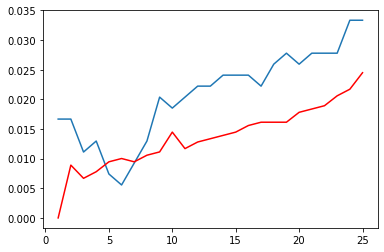

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42) 
rangek = np.arange(1,26,dtype=int)
erreur_test = np.zeros(25)
for k in rangek:
    clf = nn.KNeighborsClassifier(k) 
    clf.fit(Xtrain,ytrain)
    erreur_test[k-1] = 1-clf.score(Xtest,ytest)

plt.plot(rangek, erreur_test)
plt.plot(rangek, erreur_app, color="red")

L'erreur calcul√©e sur l'√©chantillon test (en bleu) est globalement toujours plus √©lev√©e que celle calcul√©e sur l'√©chantillon d'apprentissage (en rouge), mais est g√©n√©ralement plus fiable. Ici, on obtient le meilleur score pour $k=6$, alors que nous avions une meilleure erreur d'apprentissage pour $k=3$. On remarque qu'on n'a plus l'erreur nulle (en test) pour $k=1$

Le hold-out pratiqu√© ainsi m√®ne √† une estimation de l'erreur r√©elle qui d√©pend fortement de l'ensemble train et de l'ensemble test, qui ont √©t√© obtenus au hasard, o√π nous ne contr√¥lons que leur taille et le fait qu'un exemple ne peut √™tre dans l'un et l'autre (quoiqu'il existe des variantes!).

Afin d'√©viter cette trop forte d√©pendance qui m√®ne √† une estimation tr√®s biais√©e, l'usage est g√©n√©ralement de r√©p√©ter cette s√©quence "split -- learn -- test -- estimate error " un certain nombre de fois, disons ùëá
fois, en s'assurant que les ensembles produits au hasard √† chaque fois sont diff√©rents d'une it√©ration √† l'autre. Une fois les ùëá s√©quences r√©alis√©es, une meilleure estimation est donn√©e par la moyenne des erreurs estim√©es √† chaque s√©quence.

Programmez la r√©p√©tition de 10
s√©quences de hold-out pour estimer l'erreur r√©elle d'un kppv avec ùëò=3 en moyennant les erreurs obtenues √† chaque s√©quence (attention √† garantir des splits diff√©rents √† chaque s√©quence ! Il est conseill√©, pour bien comprendre, de visualiser les diff√©rences d'estimations √† chaque s√©quence).

In [27]:
erreur_test = np.zeros(10)
k = 3
for iho in range(10):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=iho) # graine change
    clf = nn.KNeighborsClassifier(k) 
    clf.fit(Xtrain,ytrain)
    erreur_test[iho] = 1-clf.score(Xtest,ytest)
print(erreur_test)
print (erreur_test.mean())

[0.01296296 0.01111111 0.01851852 0.01481481 0.01481481 0.00925926
 0.01111111 0.01296296 0.01481481 0.01666667]
0.013703703703703708


On obtient une erreur moyenne sensiblement sup√©rieure √† celle estim√©e par hold-out simple ; c'est un coup de bol puisque nous voyons que selon le split, l'erreur estim√©e est diff√©rente.

### 4.2. Validation crois√©e

Une fa√ßon tr√®s classique et plut√¥t robuste d'estimer l'erreur r√©elle est de mettre en place une validation crois√©e : c'est une variante du hold-out r√©p√©t√©, mais qui s'assure que chaque exemple a √©t√© pris au moins une fois pour apprendre, et au moins une fois pour tester.

Sous scikit learn, nous disposons de la fonction cross_val_score du package sklearn.model_selection. Il suffit de lui passer le classifieur consid√©r√©, le tableau des donn√©es, celui des classes, et le nombre de folds √† cr√©er: voir la documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html. 

Cette fonction retourne le tableau des erreurs faite sur chaque partition : il suffit de moyenner ce tableau.
**Attention, cette fonction ne cr√©e pas un mod√®le, mais n'est utilis√©e que pour estimer le score.**

Ecrire un programme permettant d'estimer, par validation crois√©e 10
folds, l'erreur d'un kppv avec ùëò=3 sur les donn√©es digits. Obtenez-vous la m√™me estimation de l'erreur r√©elle qu'avec le hold-out r√©p√©t√© ?

In [25]:
from sklearn.model_selection import cross_val_score
k = 3
clf = nn.KNeighborsClassifier(k) 
erreur = 1. - cross_val_score(clf, X, y, cv=10)
print(erreur)
print(erreur.mean())

0.02336747361887028


Nous obtenons une estimation d'un centi√®me au dessus de celle par hold-out. L'estimation par validation crois√©e est r√©put√©e plus fiable (faible biais et robuste) que celle par hold-out, mais ce n'est pas formellement prouv√©.

Par d√©faut, cette fonction estime l'erreur r√©elle (ou le taux de bonne classification). Il est cependant possible d'estimer d'autres m√©triques, comme le rappel, la $F$-mesure, etc., gr√¢ce √† son argument __scoring__ qui peut √™tre affect√© √† une cha√Æne de caract√®res sp√©cifiant la m√©trique d√©sir√©e (parmi toutes celles impl√©ment√©es dans sklearn, cf https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

Estimez par validation crois√©e la F1-mesure de notre classifieur par validation crois√©e $5$ folds (attention, le probl√®me de classification n'est pas binaire, ici).

In [33]:
clf = nn.KNeighborsClassifier(k) 
mon_score = cross_val_score(clf, X, y, cv=5, scoring = 'f1_macro')
print(mon_score)
print(mon_score.mean())

[0.95576632 0.95817631 0.96623133 0.98602146 0.96652397]
0.9665438778837953


## 5. Variation autour de la m√©trique  (optionnel mais instructif)

Au del√† du nombre de voisins, un autre hyper-param√®tre est la m√©trique utilis√©e pour calculer la distance entre les exemples. Par d√©faut, la distance de Minkowski est utilis√©e, avec le param√®tre $p=2$ qui indique que nous consid√©rons la distance euclidienne. Avec $p=1$, nous aurions la distance de manhattan, et de fa√ßon g√©n√©rale, avec p>0, la distance utilis√©e est $l_p$ :

$$l_p(x, x')=(\sum_{i=1}^n |x_i - x'_i|^p)^{\frac{1}{p}}$$

Ecrire un programme permettant de faire varier la distance utilis√©e pour √©valuer son impact sur les performances, en faisant aussi varier $k$. Tracez les 3 courbes sur un m√™me plot (cf. doc de *plot* pour voir comment faire), une pour chaque valeur de $p$ parmi ${1,2,5}$.

No handles with labels found to put in legend.


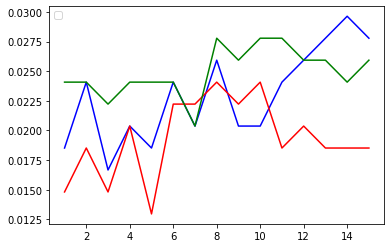

In [34]:
from sklearn.neighbors import DistanceMetric # inutile car embarque dans KNC

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=34) 

rangek = np.arange(1,16,dtype=int) # nb de voisins
rangep = np.array([1,2,5]) # degre de distance de Minkowski
erreur_test = np.zeros((rangep.shape[0],rangek.shape[0])) # matrice d'erreurs selon p en ligne et k en colonne
for ip in range(rangep.shape[0]): # pour chaque distance
    for k in rangek: # pour chaque nombre de voisins a considerer
        clf = nn.KNeighborsClassifier(k, p=rangep[ip]) 
        clf.fit(Xtrain,ytrain)
        erreur_test[ip,k-1] = 1-clf.score(Xtest,ytest)
colors = ["blue","red","green","yellow","gray", "purple"]
plt.legend(loc="upper left")
for ip in range(rangep.shape[0]):
    plt.plot(rangek, erreur_test[ip], color=colors[ip], label = "minkowski p="+str(rangep[ip]))
plt.show()

Beaucoup de m√©triques sont disponibles sous sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Je ne sais pas pourquoi les l√©gendes ne fonctionnent pas... La courbe bleue est pour p=1, la rouge pour p=2 (on retrouve la m√™me courbe que pr√©c√©demment, puisque la distance euclidienne est celle prise par d√©faut par KNNC, qui est la Minkowski avec p=2), et la verte pour p=5. 

La verte (p=5) semble plus stable dans le cas des donn√©es digits avec $k\leq 10$ (m√™me bon score avec $k=3,4,6,7,8,9,10$), alors que la distance L1 est catastrophique (tout est relatif, les scores sont plut√¥t globalement bons), et que la distance euclidienne donne le meilleur r√©sultat ($k=5$) mais reste tr√®s instable. 

Le choix du meilleur couple d'hyper-param√®tres est difficile, ici : soit on prend les meilleurs (k=5, p=2), soit on prend les seconds meilleurs pour privil√©gier la stabilit√©. Dans la vraie vie, nous aurions cherch√© √† obtenir bons r√©sultats ET stabilit√©, donc avec d'autres valeurs de $k$ et $p$, voire d'autres distances que celles de Minkowski.

## 6. Matrice de confusion
Maintenant que vous avez s√©lectionn√© les meilleurs valeurs de $k$ et $p$, vous pouvez analyser plus finement les performances de votre meilleur classifieur. Pour cela, construisez la matrice de confusion, de taille $10 \times 10$, dans laquelle l'√©l√©ments $(i,j)$ correspond au nombre de fois qu'un exemple d'√©tiquette $i$ a √©t√© pr√©dit avec une √©tiquette $j$. Quelles sont les confusions fr√©quentes?

In [35]:
from sklearn.metrics import confusion_matrix
k = 6
pminkowski = 5

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42) 
clf = nn.KNeighborsClassifier(n_neighbors=k, p=pminkowski) 
clf.fit(Xtrain,ytrain)
yPredit = clf.predict(Xtest)
confusion = confusion_matrix(ytest, yPredit)
score = clf.score(Xtest, ytest)
erreur = 1. - score

print(confusion)
print(erreur)
print(score)

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 65  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  1  0  0  0  0  0  0 41  1]
 [ 0  0  0  1  1  1  0  0  0 56]]
0.011111111111111072
0.9888888888888889


Le score est excellent. Nous retrouvons 6 confusions plut√¥t √©parpill√©es, mais pas de confusion majeure entre deux classes, alors que les confusions connues sur ce jeu de donn√©es sont celles entre les classes (1,7), (4,9) et (3,8), qui n'apparaissent pas ici (o√π la derni√®re classe -9- voit certains de ses exemples mal class√©s vers 3, 4, et 5 ; o√π un exemple de 8 est class√© vers 1 et un autre vers 9, et enfin un exemple de 5 est class√© vers 4).

**Optionnel.**
Une manipulation int√©ressante √† faire consiste √† retourner les images en leur faisant subir une rotation √† 180¬∫: de cette fa√ßon, les 6 ressemblent ensuite √† des 9 et vice-versa, les 0 restent des 0, et les autres chiffres donnent parfois des caract√®res ind√©finis. Faites des essais sur quelques exemples en les affichant pour trouver comment retourner une image, puis appliquez un k-NN ainsi: apprenez sur tout l'ensemble d'images originales, testez sur l'ensemble de toutes les images retourn√©es, affichez la matrice de confusion pour voir dans quelle mesure les 6 sont reconnus comme des 9 et observez d'autres ph√©nom√®nes.

CORRECTION:  on ne transforme que les donn√©es test via une sym√©trie d'axe horizontal

In [36]:
from PIL import Image

def retourner_test(XT):
    newXT = np.zeros((XT.shape[0],XT.shape[1]))
    nb_t = XT.shape[0]
    for index in range(nb_t):
        tab_image = XT[index,:].copy()
        image = tab_image.reshape((8,8))
        for i in range(4):
            for j in range(8):
                tmp = image[i,j]
                image[i,j] = image[8-i-1,8-j-1]
                image[8-i-1,8-j-1] = tmp
        tab_image = image.reshape((64,))
        for i in range(tab_image.shape[0]):
            newXT[index,i] = tab_image[i]
    return newXT
    
newXTest = retourner_test(Xtest)
clf = nn.KNeighborsClassifier(n_neighbors=k, p=pminkowski) 
clf.fit(Xtrain,ytrain)
yPredit = clf.predict(newXTest)
confusion = confusion_matrix(ytest, yPredit)
score = clf.score(newXTest, ytest)
erreur = 1. - score

print(confusion)
print(score)

[[53  0  0  0  0  0  0  0  0  0]
 [ 2 29  0  6  4  3  3  3  0  0]
 [ 2  1 30  7  0  1  1  0  5  0]
 [ 1  0 13  0  0  6  6  0 28  0]
 [ 7  5  0  0 43  1  0  2  0  2]
 [ 0  0  0 20  0 42  0  0  0  4]
 [ 0  0  0  0  1  0  0  0  2 50]
 [ 4 10  0  0  4  2  6  1 28  0]
 [ 0  1  0  4  0  2  0  0 36  0]
 [ 5  0  0  1  3  6 37  0  7  0]]
0.43333333333333335


Nous observons plus d'erreurs (donc un moindre score), et des confusions sont apparues qui semblent coh√©rentes au regard de la sym√©trie d'√©criture manuscrite des chiffres. Par exemple, il existe 50 √©critures du chiffre 6 confondues avec des 9, et 37 √©critures de 9 confondues avec des 6 : avec cette sym√©trie centrale, on s'attendait effectivement √† ces confusions entre 6 et 8. 

Dans une moindre mesure, nous observons aussi 28 confusions de 7 par des 8, et de 3 par des 8, et 13 confusions de 3 par des 2 (et 7 √† l'inverse).

Ceci ne change finalement rien sur les 0, et tr√®s peu de changements sur le rappel des chiffres 5.

#### Visualisations des sym√©tries sur donn√©es test

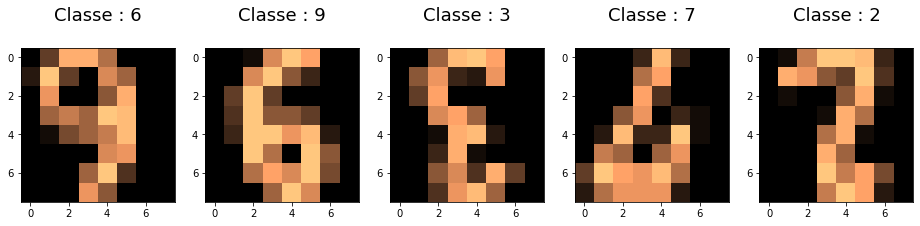

In [37]:
plt.figure(figsize=(16,4))
for index in range(5):
    image = newXTest[index, :]
    classe = ytest[index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Classe : %i\n' % classe, fontsize = 18)  
plt.show()

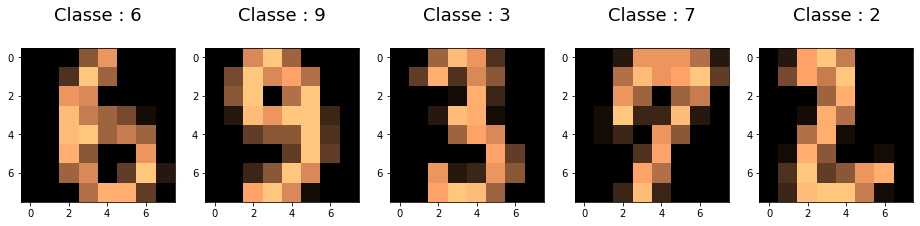

In [38]:
plt.figure(figsize=(16,4))
for index in range(5):
    image = Xtest[index, :]
    classe = ytest[index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Classe : %i\n' % classe, fontsize = 18)  
plt.show()